<a href="https://colab.research.google.com/github/ahan-2000/Birdcall_Identification/blob/main/Birdcall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
!pip install pydub


In [4]:
!pip install audiomentations
!pip install pydub
!pip install tensorflow_addons

In [5]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 21.2MB/s 


In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import zipfile
from IPython.display import Audio
from pydub import AudioSegment
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
import random
from tqdm import tqdm
import datetime
from audiomentations import *
import multiprocessing
import cv2
# # library used to process the audio files
import librosa
import librosa.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Softmax, LSTM, Embedding, concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from IPython.display import Image

In [7]:
# loading train data
train_df = pd.read_csv('/content/drive/MyDrive/birdsong/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/birdsong/test.csv')
train_df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [8]:
train_df.shape

(21375, 35)

In [9]:
null_columns=train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

playback_used      1800
bird_seen          1800
description        6199
bitrate_of_mp3        8
background        13075
dtype: int64

In [10]:
data4=list()

In [11]:
import os

train_audio_path = '/content/drive/MyDrive/birdsong/train_audio'
print("train_audio exists: ", os.path.exists(train_audio_path))

for dirname, _, filenames in os.walk(train_audio_path):
    _.sort()
    for filename in sorted(filenames):
        print(os.path.join(dirname, filename))
        data4.append((dirname,filename))
        
df2= pd.DataFrame(data4, columns=['dirnames','filename'])



Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC504338.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC504340.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC54371.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC70951.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC71563.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC71564.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC71565.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC71566.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC71567.mp3
/content/drive/MyDrive/birdsong/train_audio/ribgul/XC75111.mp3
/content/drive/MyDrive/birdsong/train_audio/rinduc/XC139900.mp3
/content/drive/MyDrive/birdsong/train_audio/rinduc/XC143031.mp3
/content/drive/MyDrive/birdsong/train_audio/rinduc/XC152763.mp3
/content/drive/MyDrive/birdsong/train_audio/rinduc/XC157581.mp3
/content/drive/MyDrive/birdsong/train_audio/rinduc/XC170064.m

In [12]:
df2.shape

(21375, 2)

In [13]:
df2.head()

,dirnames,filename
0,/content/drive/MyDrive/birdsong/train_audio/al...,XC134874.mp3
1,/content/drive/MyDrive/birdsong/train_audio/al...,XC135454.mp3
2,/content/drive/MyDrive/birdsong/train_audio/al...,XC135455.mp3
3,/content/drive/MyDrive/birdsong/train_audio/al...,XC135456.mp3
4,/content/drive/MyDrive/birdsong/train_audio/al...,XC135457.mp3


In [14]:
df2['directory'] = df2['dirnames'].str.cat(df2['filename'], sep ="/") 
print(df2)

                                                dirnames  ...                                          directory
0      /content/drive/MyDrive/birdsong/train_audio/al...  ...  /content/drive/MyDrive/birdsong/train_audio/al...
1      /content/drive/MyDrive/birdsong/train_audio/al...  ...  /content/drive/MyDrive/birdsong/train_audio/al...
2      /content/drive/MyDrive/birdsong/train_audio/al...  ...  /content/drive/MyDrive/birdsong/train_audio/al...
3      /content/drive/MyDrive/birdsong/train_audio/al...  ...  /content/drive/MyDrive/birdsong/train_audio/al...
4      /content/drive/MyDrive/birdsong/train_audio/al...  ...  /content/drive/MyDrive/birdsong/train_audio/al...
...                                                  ...  ...                                                ...
21370  /content/drive/MyDrive/birdsong/train_audio/ye...  ...  /content/drive/MyDrive/birdsong/train_audio/ye...
21371  /content/drive/MyDrive/birdsong/train_audio/ye...  ...  /content/drive/MyDrive/birdsong/t

In [15]:
df2.tail()

,dirnames,filename,directory
21370,/content/drive/MyDrive/birdsong/train_audio/ye...,XC477608.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21371,/content/drive/MyDrive/birdsong/train_audio/ye...,XC500348.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21372,/content/drive/MyDrive/birdsong/train_audio/ye...,XC501230.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21373,/content/drive/MyDrive/birdsong/train_audio/ye...,XC54828.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21374,/content/drive/MyDrive/birdsong/train_audio/ye...,XC55761.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...


In [16]:
df2.isnull().sum

<bound method DataFrame.sum of        dirnames  filename  directory
0         False     False      False
1         False     False      False
2         False     False      False
3         False     False      False
4         False     False      False
...         ...       ...        ...
21370     False     False      False
21371     False     False      False
21372     False     False      False
21373     False     False      False
21374     False     False      False

[21375 rows x 3 columns]>

In [17]:
# concatenating the DataFrames 
df3 = pd.concat([train_df, df2], join = 'outer', axis = 1) 
  


In [18]:
df3.isnull().sum

<bound method DataFrame.sum of        rating  playback_used  ebird_code  ...  dirnames  filename  directory
0       False          False       False  ...     False     False      False
1       False          False       False  ...     False     False      False
2       False          False       False  ...     False     False      False
3       False          False       False  ...     False     False      False
4       False          False       False  ...     False     False      False
...       ...            ...         ...  ...       ...       ...        ...
21370   False          False       False  ...     False     False      False
21371   False          False       False  ...     False     False      False
21372   False          False       False  ...     False     False      False
21373   False          False       False  ...     False     False      False
21374   False          False       False  ...     False     False      False

[21375 rows x 38 columns]>

In [19]:
df3.tail()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license,dirnames,filename,directory
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,4-6,XC477608 Yellow-throated Vireo (Vireo flavifrons),"['Dryobates pubescens_Downy Woodpecker', 'Poli...",yes,Vireo flavifrons,"Spring Valley (near Waynesville), Greene Cty...",39.5734,48000 (Hz),song,220 m,Natural vocalization,192000 (bps),mp3,both,Downy Woodpecker (Dryobates pubescens); Blue-g...,477608,https://www.xeno-canto.org/477608,United States,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/ye...,XC477608.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,Not specified,XC500348 Yellow-throated Vireo (Vireo flavifrons),"['Vireo olivaceus_Red-eyed Vireo', 'Polioptila...",yes,Vireo flavifrons,"Crow's Nest Natural Area Preserve, Stafford C...",38.3619,48000 (Hz),song,50 m,Field Number: VA2017 JRS 09,256000 (bps),mp3,Not specified,Red-eyed Vireo (Vireo olivaceus); Blue-grey Gn...,500348,https://www.xeno-canto.org/500348,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,15:00,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/ye...,XC500348.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21372,5.0,no,yetvir,1 (mono),2017-06-10,Not specified,96,XC501230.mp3,Not specified,Yellow-throated Vireo,Not specified,XC501230 Yellow-throated Vireo (Vireo flavifrons),[],yes,Vireo flavifrons,"Crow's Nest Natural Area Preserve, Stafford C...",38.3619,48000 (Hz),song,50 m,Field Number: VA2017 JRS 24; close and visible...,256000 (bps),mp3,Not specified,NaN,501230,https://www.xeno-canto.org/501230,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,13:30,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/ye...,XC501230.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21373,3.5,no,yetvir,2 (stereo),2009-05-06,level,35,XC54828.mp3,level,Yellow-throated Vireo,4-6,XC54828 Yellow-throated Vireo (Vireo flavifrons),['Cardinalis cardinalis_Northern Cardinal'],yes,Vireo flavifrons,"Sharp's Ridge Memorial Park, Knoxville, Tenne...",36.0008,44100 (Hz),song,200 m,NaN,128000 (bps),mp3,level,Northern Cardinal (Cardinalis cardinalis),54828,https://www.xeno-canto.org/54828,United States,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.9462,>10(s),9:45am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/ye...,XC54828.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...
21374,3.5,no,yetvir,2 (stereo),2010-06-09,level,103,XC55761.mp3,level,Yellow-throated Vireo,4-6,XC55761 Yellow-throated Vireo (Vireo flavifrons),['Setophaga dominica_Yellow-throated Warbler'],yes,Vireo flavifrons,"Park Headquarters Rd W, Sugarlands, Great Smo...",35.6878,44100 (Hz),song,1000 m,NaN,128000 (bps),mp3,level,Yellow-throated Warbler (Setophaga dominica),55761,https://www.xeno-canto.org/55761,United States,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.5409,>10(s),11:30am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/ye...,XC55761.mp3,/content/drive/MyDrive/birdsong/train_audio/ye...


In [20]:
train_df=df3

In [21]:
train_df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license,dirnames,filename,directory
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,/content/drive/MyDrive/birdsong/train_audio/al...,XC134874.mp3,/content/drive/MyDrive/birdsong/train_audio/al...
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/al...,XC135454.mp3,/content/drive/MyDrive/birdsong/train_audio/al...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/al...,XC135455.mp3,/content/drive/MyDrive/birdsong/train_audio/al...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/al...,XC135456.mp3,/content/drive/MyDrive/birdsong/train_audio/al...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,/content/drive/MyDrive/birdsong/train_audio/al...,XC135457.mp3,/content/drive/MyDrive/birdsong/train_audio/al...


In [22]:
test_df.head()

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


In [23]:
# checking the train data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [24]:
# Checking the unique types of bird species in the data
print("Number of bird species:",len(train_df['species'].unique()))

Number of bird species: 264


In [25]:
y_labels = train_df['ebird_code'].unique()
print("Bird species in abbrebviated: ",y_labels[:5])
print("BIrd Speccies: ",train_df['species'].unique()[:5])

Bird species in abbrebviated:  ['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi']
BIrd Speccies:  ['Alder Flycatcher' 'American Avocet' 'American Bittern' 'American Crow'
 'American Goldfinch']


In [26]:
# dataframe containg the path to the audio files and the class labels
df_audio = train_df[['filename','directory','duration','sampling_rate','ebird_code']]
df_audio.to_csv('df_audio.csv',index=False)


In [27]:

df_audio = pd.read_csv('df_audio.csv')
df_audio.head(2)

,filename,filename.1,directory,duration,sampling_rate,ebird_code
0,XC134874.mp3,XC134874.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,25,48000 (Hz),aldfly
1,XC135454.mp3,XC135454.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,36,44100 (Hz),aldfly


In [28]:
df_audio = pd.read_csv('df_audio.csv')
df_audio.head()

,filename,filename.1,directory,duration,sampling_rate,ebird_code
0,XC134874.mp3,XC134874.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,25,48000 (Hz),aldfly
1,XC135454.mp3,XC135454.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,36,44100 (Hz),aldfly
2,XC135455.mp3,XC135455.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,39,44100 (Hz),aldfly
3,XC135456.mp3,XC135456.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,33,44100 (Hz),aldfly
4,XC135457.mp3,XC135457.mp3,/content/drive/MyDrive/birdsong/train_audio/al...,36,44100 (Hz),aldfly


In [29]:

#split the data into train and validation and save in X_train, X_cv, y_train, y_cv
#use stratify sampling,random state of 45 and validaton size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_audio,df_audio.ebird_code,test_size=0.2, 
                                                    random_state=45,stratify=df_audio.ebird_code)

print("Training data: ",X_train.shape,y_train.shape)
print("Validataion data: ",X_test.shape,y_test.shape)



Training data:  (17100, 6) (17100,)
Validataion data:  (4275, 6) (4275,)


In [30]:
X_train.head()

,filename,filename.1,directory,duration,sampling_rate,ebird_code
14151,XC465329.mp3,XC465329.mp3,/content/drive/MyDrive/birdsong/train_audio/os...,36,44100 (Hz),osprey
14723,XC454672.mp3,XC454672.mp3,/content/drive/MyDrive/birdsong/train_audio/pi...,15,48000 (Hz),pibgre
14035,XC358544.mp3,XC358544.mp3,/content/drive/MyDrive/birdsong/train_audio/or...,61,48000 (Hz),orcwar
16425,XC145611.mp3,XC145611.mp3,/content/drive/MyDrive/birdsong/train_audio/ro...,52,44100 (Hz),robgro
18291,XC182419.mp3,XC182419.mp3,/content/drive/MyDrive/birdsong/train_audio/st...,3,44100 (Hz),stejay


In [31]:

bird_species_mapping = dict(zip(train_df['ebird_code'],train_df['species']))
# Integer coding the class labels
ebird_code_labeled = dict()
ebird_code_classes = dict()

ebird_code_labeled['nocall'] = 0
ebird_code_classes[0] = 'nocall'
for i, bird in enumerate(df_audio['ebird_code'].unique()):
    ebird_code_labeled[bird] = i+1
    ebird_code_classes[i+1] = bird
    


In [32]:

# sampling audio to 5 seconds length
def raw_data(filename,bird_code,raw_df):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    data_point_per_second = 10
    
    #Take 10 data points every second
    samples = samples[0::int(sample_rate/data_point_per_second)]
    #We normalize each sample before extracting 5s samples from it
    normalized_sample = sklearn.preprocessing.minmax_scale(samples, axis=0)
    
    #only take 5s samples and add them to the dataframe
    song_sample = []
    sample_length = 5*data_point_per_second
    for idx in range(0,len(normalized_sample),sample_length): 
        song_sample = normalized_sample[idx:idx+sample_length]
        if len(song_sample)>=sample_length:
            raw_df = raw_df.append({"song_samples":np.asarray(song_sample).astype(np.float32),
                                            "bird_code":ebird_code_labeled[bird_code]}, ignore_index=True)
    return raw_df

In [ ]:
'''
raw_df = pd.DataFrame(columns=["song_samples","bird_code"])
for i, row in tqdm(df_audio[['directory','ebird_code']][12327:].iterrows()):
    raw_df = raw_data(row.directory, row.ebird_code, raw_df)
    
raw_df.to_csv('raw_df.csv',index=False)

In [33]:
# stacking the image to 3 channels for CNN models
def mono_to_color(X: np.ndarray, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    X = X - mean
    std = std or X.std()
    Xstd = X / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Normalize to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

In [ ]:
'''
os.makedirs('/content/drive/MyDrive/ResNet/tr/images_data')
os.makedirs('/content/drive/MyDrive/Inception/tr/images_data')
os.makedirs('/content/drive/MyDrive/spec_data/tr/images_data')

#test dir
os.makedirs('/content/drive/MyDrive/ResNet/val/images_data')
os.makedirs('/content/drive/MyDrive/Inception/val/images_data')
os.makedirs('/content/drive/MyDrive/spec_data/val/images_data')


In [34]:
# sampling audio to 5 seconds length
def spectrogram_images(directory,bird_code):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(directory,sr=44100)
    except:
        sound = AudioSegment.from_file(directory)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    
    #only take 5s samples and save them to the np array
    sample_length = 5*sample_rate
    X = np.abs(librosa.stft(samples[:44100*5], n_fft=1024, hop_length=512))
    spectrogram = librosa.amplitude_to_db(X)
    image = mono_to_color(spectrogram)

    res = cv2.resize(image, (224, 224))
    res = (res / 255.0).astype(np.float32)
    res = np.asarray(res)
    
    incep = cv2.resize(image, (299, 299))
    incep = (incep / 255.0).astype(np.float32)
    incep = np.asarray(incep)
    
    label = ebird_code_labeled[bird_code]
    
    return spectrogram,res,incep,label


def func(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_train[['directory','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.directory, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
    
    # stroing the data as npz file for easy access
#     np.savez_compressed('processed_data/VGG/STFT/train/images_data'+str(idx),a=spec,b=labels)
    np.savez_compressed('/content/drive/MyDrive/ResNet/tr/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('/content/drive/MyDrive/Inception/tr/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('/content/drive/MyDrive/spec_data/tr/images_data'+str(idx),a=spec,b=labels)
    
def func1(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_test[['directory','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.directory, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
        
#     np.savez_compressed('processed_data/VGG/STFT/validation/images_data'+str(idx),a=spec,b=labels)    
    np.savez_compressed('/content/drive/MyDrive/ResNet/val/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('/content/drive/MyDrive/Inception/tr/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('/content/drive/MyDrive/spec_data/tr/images_data'+str(idx),a=spec,b=labels)

In [ ]:
'''
for i in tqdm(range(0,535,8)):
    if i != 528:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()

In [ ]:
'''
for i in tqdm(range(0,134,8)):
    if i != 128:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func1, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func1, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()

100%|██████████| 17/17 [1:31:10<00:00, 321.81s/it]


In [35]:
raw_df= pd.read_csv('/content/drive/MyDrive/raw_df.csv')

Spec images data:  (32, 224, 224, 3) (32,)


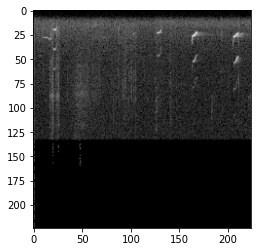

In [36]:
# checking the data after pre-processing
img = np.load('/content/drive/MyDrive/ResNet/tr/images_data0.npz')
print("Spec images data: ",img['a'].shape,img['b'].shape)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(img['a'][0])


In [50]:
# defining the metrics and callbacks
NUM_CLASSES = len(ebird_code_classes.keys())

# loss function to minimize
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(y_true, y_pred):
    loss_ = loss_object(y_true, y_pred)

    return tf.reduce_mean(loss_)

# def f1(y_true, y_pred, threshold=0.5, avg="samples"):
#     """
#     The f1 metric for the problem
#     Arguments:
#         truth {np array [N] or [N x C]} -- Ground truths
#         pred {np array [N x C]} -- Predicted probabilites
#     Keyword Arguments:
#         threshold {float} -- Threshold for classification (default: {0.5})
#         avg {str} -- How to perform average in the f1 score (default: {"samples"})
#     Returns:
#         float -- f1 score
#     """

#     if len(y_true.shape) == 1:
#         y_true = TARGETS[y_true]

#     y_pred = (y_pred > threshold).astype(int)

#     return f1_score(y_true, y_pred, average=avg)

# performance metric
fs = tfa.metrics.F1Score(num_classes=265,average="weighted",threshold=0.5)
acc = tf.keras.metrics.BinaryAccuracy(threshold=0.5)


def callbacks(log_file_path,model_path):
    # define callbacks for learning rate scheduling and best checkpoints saving
    log_dir1 = "models_multi_labels/logs/"+ log_file_path + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)
    md = ModelCheckpoint('models_multi_labels/'+ model_path +'.h5', monitor='val_loss', save_best_only=True, mode='min')
    rl = ReduceLROnPlateau(monitor='val_loss',patience=5)
    es = EarlyStopping(monitor='val_loss', patience=8)

    callbacks = [tbc1, md, rl,es]
    
    return callbacks

In [51]:
def plot_summary(hist):
    """
    Function to plot the loss and accuracy per epoch
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [ ]:
song_samples = raw_df.song_samples
y = raw_df.bird_code

X = []
for samples in song_samples:
    a = ','.join([i.strip('[]') for i in samples.strip().split()])
    a = np.fromstring(a, dtype=np.float, sep=',' )
    X.append(a)

X = np.asarray(X)

# split the data into train and validation and save in X_train, X_cv, y_train, y_cv
# use stratify sampling,random state of 45 and validaton size of 20%
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (78092, 50) (78092,)
Validataion data:  (19523, 50) (19523,)


In [ ]:
sequence_length = 50
training_size = X_tr.shape[0]
validation_size = X_te.shape[0]

# Training set
X_tr = np.reshape(X_tr,(training_size,1,sequence_length))
y_tr = to_categorical(y_tr, num_classes=len(ebird_code_classes.keys()), dtype='float32' )

# Validation set
X_te = np.reshape(X_te,(validation_size,1,sequence_length))
y_te = to_categorical(y_te, num_classes=len(ebird_code_classes.keys()), dtype='float32')

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (78092, 1, 50) (78092, 265)
Validataion data:  (19523, 1, 50) (19523, 265)


In [ ]:
input_layer = Input(shape=X_tr.shape[1:],name='input')
lstm_layer = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
bn1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, name='bn1')(lstm_layer)
lstm_2 = LSTM(32, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='glorot_uniform', 
              recurrent_initializer='orthogonal', name='lstm2')(bn1)
dense1 = Dense(256, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(lstm_2)
dp = Dropout(0.3)(dense1)
output = Dense(NUM_CLASSES, activation="sigmoid")(dp)

model_lstm1 = Model(inputs=input_layer,outputs=output)
model_lstm1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1, 50)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 1, 32)             10624     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 1, 32)             128       
_________________________________________________________________
lstm2 (LSTM)                 (None, 32)                8320      
_________________________________________________________________
dense1 (Dense)               (None, 256)               8448      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 265)               6810

In [ ]:
# Tuning the parmeters like optimizers, learning rate checking for overfitting/underfitting on a batch of data 
model_lstm1.compile(loss=loss_function, optimizer='sgd',metrics=[acc])

model_lstm1.fit(X_tr[:32], y_tr[:32], epochs = 3, validation_data=(X_te[:32], y_te[:32]))

Epoch 1/3
1/1 [==============================] - 4s 4s/step - loss: 5.5726 - binary_accuracy: 0.5134 - val_loss: 5.5790 - val_binary_accuracy: 0.5061
Epoch 2/3
1/1 [==============================] - 0s 50ms/step - loss: 5.5711 - binary_accuracy: 0.5159 - val_loss: 5.5789 - val_binary_accuracy: 0.5064
Epoch 3/3
1/1 [==============================] - 0s 44ms/step - loss: 5.5692 - binary_accuracy: 0.5202 - val_loss: 5.5788 - val_binary_accuracy: 0.5067


In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
callbacks = callbacks('fit1','raw_lstm')

model_lstm1.compile(loss=loss_function, optimizer=optim, metrics=[acc])

hist1 = model_lstm1.fit(X_tr, y_tr, epochs = 5, batch_size = 32, validation_data=(X_te, y_te), 
                    callbacks=callbacks)

Epoch 1/5
2441/2441 [==============================] - 24s 8ms/step - loss: 0.0723 - binary_accuracy: 0.9878 - val_loss: 0.0210 - val_binary_accuracy: 0.9962
Epoch 2/5
2441/2441 [==============================] - 18s 7ms/step - loss: 0.0212 - binary_accuracy: 0.9962 - val_loss: 0.0209 - val_binary_accuracy: 0.9962
Epoch 3/5
2441/2441 [==============================] - 20s 8ms/step - loss: 0.0210 - binary_accuracy: 0.9962 - val_loss: 0.0209 - val_binary_accuracy: 0.9962
Epoch 4/5
2441/2441 [==============================] - 19s 8ms/step - loss: 0.0210 - binary_accuracy: 0.9962 - val_loss: 0.0209 - val_binary_accuracy: 0.9962
Epoch 5/5
2441/2441 [==============================] - 19s 8ms/step - loss: 0.0210 - binary_accuracy: 0.9962 - val_loss: 0.0210 - val_binary_accuracy: 0.9962


In [39]:
# https://stackoverflow.com/questions/53788434/training-a-keras-model-from-batches-of-npy-files-using-generator
# https://stackoverflow.com/questions/51697727/how-to-feed-multiple-numpy-arrays-to-a-deep-learning-network-in-keras
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, dir_path, file_list):
        """Constructor can be expanded,
           with batch size, dimentation etc.
        """
        self.file_list = file_list
        self.dir_path = dir_path
        self.on_epoch_end()

    def __len__(self):
        'Take all batches in each iteration'
        return int(len(self.file_list))

    def __getitem__(self, index):
        'Get next batch'
        # Generate indexes of the batch
        indexes = self.indexes[index:(index+1)]

        # single file
        file_list_temp = [self.file_list[k] for k in indexes]

        # Set of X_train and y_train
        X, y = self.__data_generation(file_list_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.file_list))

    def __data_generation(self, file_list_temp):
        'Generates data containing batch_size samples'
#         data_loc = "processed_data/spec_data/train/"
        # Generate data
        for ID in file_list_temp:
            x_file_path = os.path.join(self.dir_path, ID)
            data = np.load(x_file_path)

            # Store sample
            X = data['a']
            # Store class
            y = data['b']
            y = to_categorical(y,num_classes=265)

        return X, y

In [40]:
# train set
train_dir_path = "/content/drive/MyDrive/spec_data/tr"
train_files_path = os.listdir(train_dir_path)
train_gen = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "/content/drive/MyDrive/spec_data/val"
test_files_path = os.listdir(test_dir_path)
test_gen = DataGenerator(train_dir_path, test_files_path)

In [ ]:
# lstm for spectrogram data
input_layer = Input(shape=train_gen[0][0].shape[1:])
lstm_layer1 = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
lstm_layer2 = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm2')(lstm_layer1)
average = tf.keras.layers.GlobalAveragePooling1D()(lstm_layer2)
layer_1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
dropout = Dropout(rate=0.2)(layer_1)
output = Dense(NUM_CLASSES, activation='sigmoid')(dropout)

model_lstm2 = Model(inputs=input_layer,outputs=output)
model_lstm2.summary()

In [44]:
# train set
train_dir_path = "/content/drive/MyDrive/ResNet/tr"
train_files_path = os.listdir(train_dir_path)
train_gen_res = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "/content/drive/MyDrive/ResNet/val"
test_files_path = os.listdir(test_dir_path)
test_gen_res = DataGenerator(train_dir_path, test_files_path)

In [56]:
# ResNet50 for spectrogram images
layer_1 = ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))
layer_1.trainable = True
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES, activation='sigmoid')(dense)

model_res50 = Model(inputs=layer_1.input,outputs=output)
model_res50.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [59]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
#callbacks = callbacks('fit4','resnet50')

model_res50.compile(loss=loss_function, optimizer=optim, metrics='accuracy')

hist4 = model_res50.fit(train_gen_res, epochs=10, steps_per_epoch=len(train_gen_res), validation_data=test_gen_res)

Epoch 1/10
534/534 [==============================] - 202s 368ms/step - loss: 5.4395 - accuracy: 0.0116 - val_loss: 13.4450 - val_accuracy: 0.0054
Epoch 2/10
534/534 [==============================] - 195s 366ms/step - loss: 4.4087 - accuracy: 0.0683 - val_loss: 3.9824 - val_accuracy: 0.1318
Epoch 3/10
534/534 [==============================] - 196s 367ms/step - loss: 3.8102 - accuracy: 0.1537 - val_loss: 3.9012 - val_accuracy: 0.1418
Epoch 4/10
534/534 [==============================] - 195s 366ms/step - loss: 3.3591 - accuracy: 0.2331 - val_loss: 3.5015 - val_accuracy: 0.2241
Epoch 5/10
534/534 [==============================] - 195s 366ms/step - loss: 2.9761 - accuracy: 0.3052 - val_loss: 3.0892 - val_accuracy: 0.2941
Epoch 6/10
534/534 [==============================] - 196s 367ms/step - loss: 2.6109 - accuracy: 0.3789 - val_loss: 2.9025 - val_accuracy: 0.3235
Epoch 7/10
534/534 [==============================] - 196s 367ms/step - loss: 2.2990 - accuracy: 0.4344 - val_loss: 3.5178 